In [1]:
# Exploratory Data Analysis on Netflix Movies and TV Shows


In [2]:
## Problem Statement
##The objective of this project is to perform exploratory data analysis on the Netflix Movies and TV Shows dataset to understand content distribution, trends over time, popular genres, and country-wise availability.
##  The analysis aims to derive meaningful insights that can support data-driven decision making in content strategy.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")



Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("C:/Users/rajku/Documents/netflix-eda-project/data/NetFlix.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [5]:
df.shape

df.info()

df.describe(include="all")

<class 'pandas.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       7787 non-null   str  
 1   type          7787 non-null   str  
 2   title         7787 non-null   str  
 3   director      5398 non-null   str  
 4   cast          7069 non-null   str  
 5   country       7280 non-null   str  
 6   date_added    7777 non-null   str  
 7   release_year  7787 non-null   int64
 8   rating        7780 non-null   str  
 9   duration      7787 non-null   int64
 10  genres        7787 non-null   str  
 11  description   7787 non-null   str  
dtypes: int64(2), str(10)
memory usage: 730.2 KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787.000000,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,NaN,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,1-Jan-20,NaN,TV-MA,NaN,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,NaN,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,69.122769,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,50.950743,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,88.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,106.000000,NaN,NaN


In [6]:
df.isnull().sum().sort_values(ascending=False)


director        2389
cast             718
country          507
date_added        10
rating             7
title              0
show_id            0
type               0
release_year       0
duration           0
genres             0
description        0
dtype: int64

In [8]:
df_clean = df.copy()


In [9]:
df_clean.isnull().sum().sort_values(ascending=False)


director        2389
cast             718
country          507
date_added        10
rating             7
title              0
show_id            0
type               0
release_year       0
duration           0
genres             0
description        0
dtype: int64

In [11]:
df_clean["director"] = df_clean["director"].fillna("Unknown")
df_clean["cast"] = df_clean["cast"].fillna("Unknown")
df_clean["country"] = df_clean["country"].fillna("Unknown")


In [16]:
### Handling Missing Values
##Columns with a large number of missing values such as director, cast, and country were filled with 'Unknown' to preserve data integrity. 
##A small number of missing values in the date_added column were retained as NaT after datetime conversion, as their proportion was negligible.
##Missing ratings were labeled as 'Not Rated' for consistency.


In [12]:
df_clean.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
genres           0
description      0
dtype: int64

In [13]:
df_clean["rating"] = df_clean["rating"].fillna("Not Rated")


In [14]:
df_clean.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
genres           0
description      0
dtype: int64

In [26]:
##Movies dominate Netflix’s catalog compared to TV Shows.
##This indicates Netflix’s historical focus on movie content.

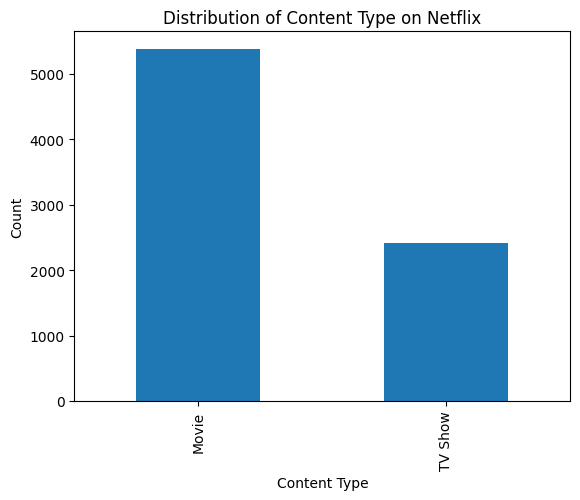

In [27]:
plt.figure()
df_clean["type"].value_counts().plot(kind="bar")
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


In [28]:
##Most content is from recent years.
##Older content exists but in much smaller quantities.

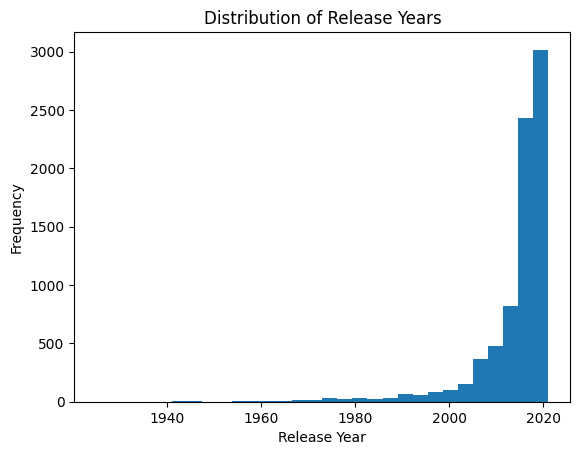

In [29]:

plt.figure()
df_clean["release_year"].plot(kind="hist", bins=30)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()


In [30]:
##The United States dominates Netflix’s content production.
##Other countries contribute significantly but at much lower volumes.

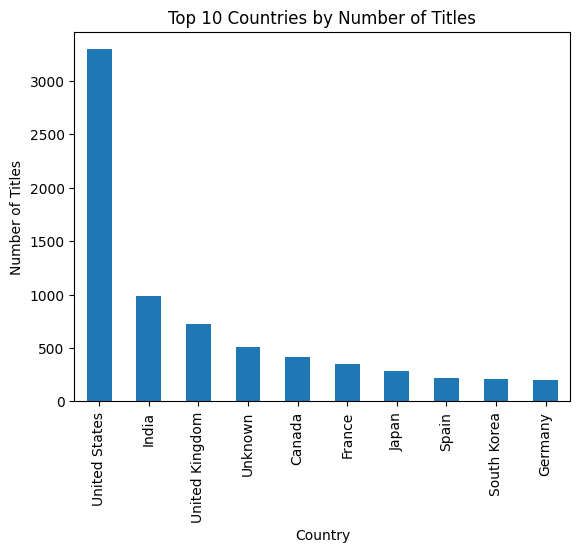

In [31]:
top_countries = (
    df_clean["country"]
    .str.split(", ")
    .explode()
    .value_counts()
    .head(10)
)

plt.figure()
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()


In [32]:
##Mature ratings (like TV-MA) are highly prevalent.
##Netflix primarily targets adult audiences.

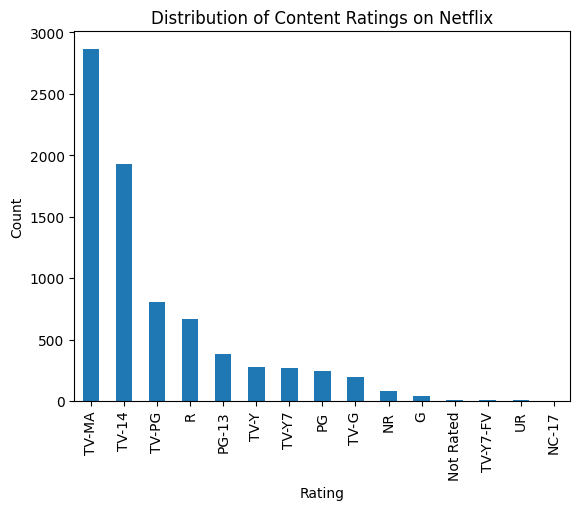

In [33]:
plt.figure()
df_clean["rating"].value_counts().plot(kind="bar")
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [34]:
## Key Observations from Univariate Analysis
##- Netflix’s catalog is dominated by movies rather than TV shows.
##- Rapid content growth occurred post-2015.
##- The majority of content is recent.
##- The United States leads content production.
##- Mature-rated content forms a significant portion of the catalog.


<Figure size 640x480 with 0 Axes>

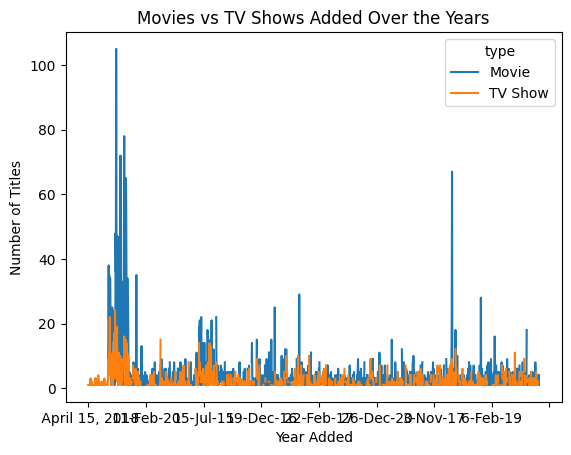

In [36]:
content_trend = (
    df_clean
    .groupby(["date_added", "type"])
    .size()
    .unstack()
)

plt.figure()
content_trend.plot()
plt.title("Movies vs TV Shows Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


In [37]:
##Movies consistently dominate additions.
##TV Shows show steady growth in recent years, indicating diversification.

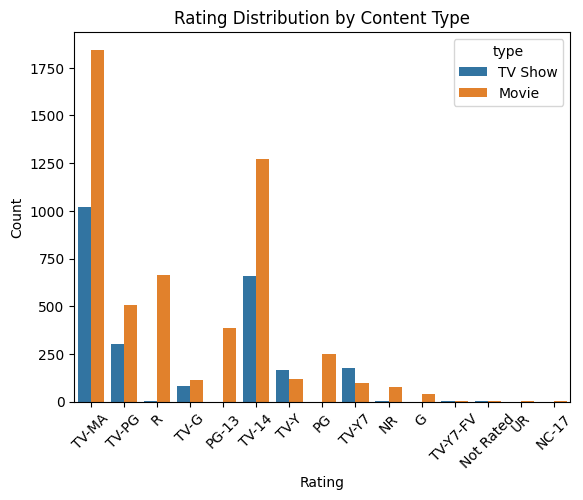

In [38]:
plt.figure()
sns.countplot(data=df_clean, x="rating", hue="type")
plt.title("Rating Distribution by Content Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [39]:
##TV Shows are more skewed toward mature ratings.
##Movies show a wider spread across ratings.

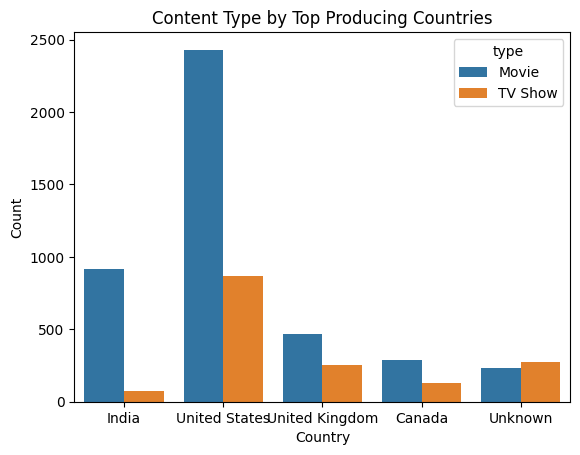

In [40]:
country_type = (
    df_clean["country"]
    .str.split(", ")
    .explode()
    .to_frame()
    .join(df_clean["type"])
)

top_countries = country_type["country"].value_counts().head(5).index

filtered = country_type[country_type["country"].isin(top_countries)]

plt.figure()
sns.countplot(data=filtered, x="country", hue="type")
plt.title("Content Type by Top Producing Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


In [41]:
##The US dominates both Movies and TV Shows.
##Some countries focus more heavily on Movies than series content.

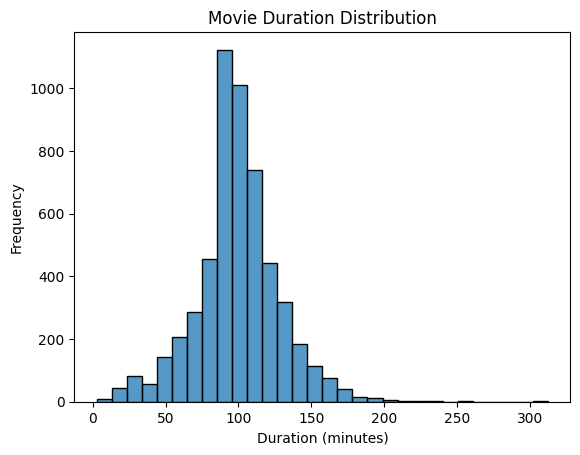

In [43]:
movies = df_clean[df_clean["type"] == "Movie"]

plt.figure()
sns.histplot(movies["duration"], bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


In [44]:
##Most Netflix movies fall within a standard feature-length range.
##Extremely long movies are rare.

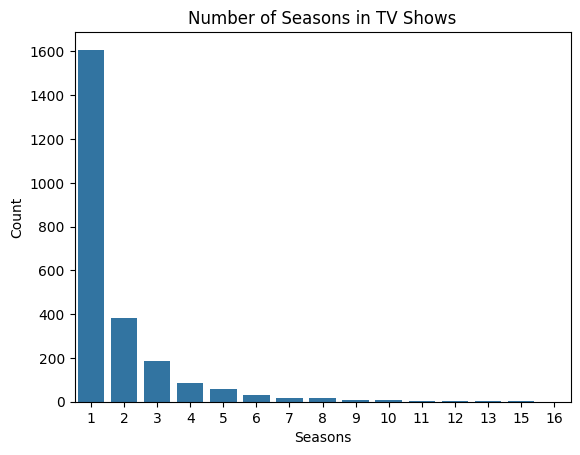

In [46]:
tv_shows = df_clean[df_clean["type"] == "TV Show"]

plt.figure()
sns.countplot(x=tv_shows["duration"])
plt.title("Number of Seasons in TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()


In [47]:
##Most TV shows have a limited number of seasons.
##Long-running series are less common on Netflix.

In [48]:
## Key Observations from Bivariate Analysis
#- Movies dominate Netflix’s catalog across years and countries.
#- TV Shows have grown steadily, especially in recent years.
#- Mature-rated content is more common among TV Shows.
#- Netflix favors shorter series formats with fewer seasons.


In [49]:
## Final Insights
#- Netflix’s content library is heavily dominated by movies, though TV shows have shown steady growth in recent years.
#- A major expansion in content addition occurred after 2015, aligning with Netflix’s global growth phase.
#- The United States is the largest contributor to Netflix’s content, followed by other emerging markets.
#- Mature-rated content (such as TV-MA) forms a significant portion of the catalog, indicating a primary adult audience.
#- Netflix favors shorter TV series with fewer seasons, suggesting a preference for limited-series formats.


In [50]:
## Limitations
#- The dataset does not include viewership or user engagement metrics, limiting analysis to content availability only.
#- Some columns contained missing or unknown values, which may affect the accuracy of certain insights.
#- The dataset represents a snapshot in time and may not reflect Netflix’s most recent content updates.
